 Simple RNN

In [ ]:
#1

#I IN THIS CODE WE NORMALIZE DATA IN RANGE[0,1]  AND THEN USE IT IN RNN WHEN WE HAVE ONE INPUT

In [ ]:
#2
# if you are not runing this code in google colab,ignore this part:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


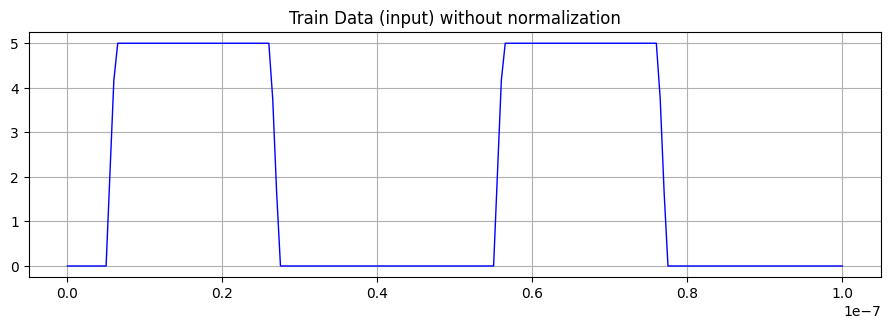

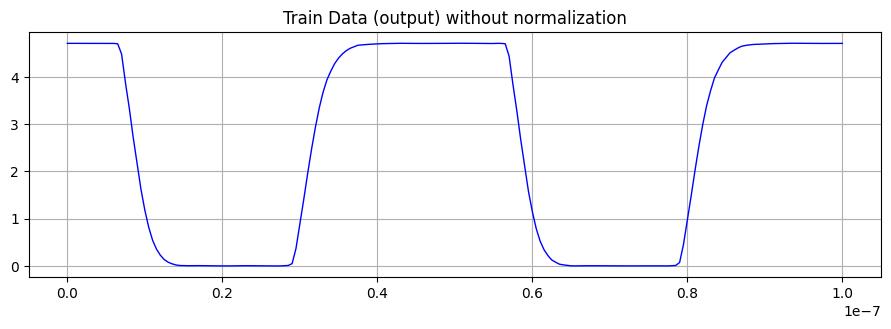

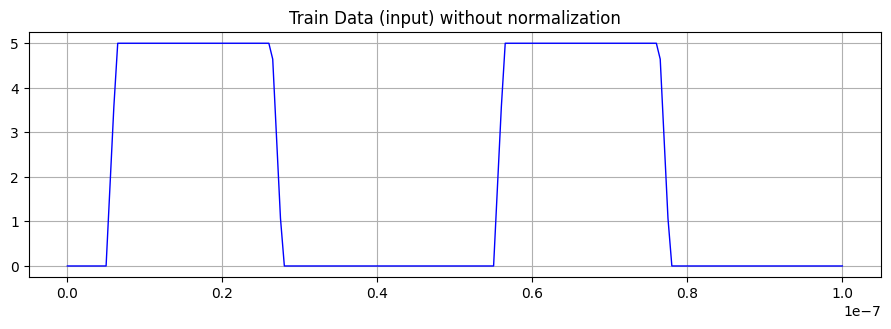

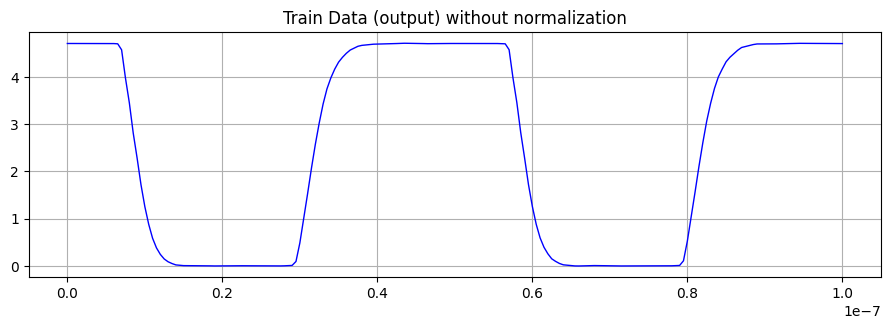

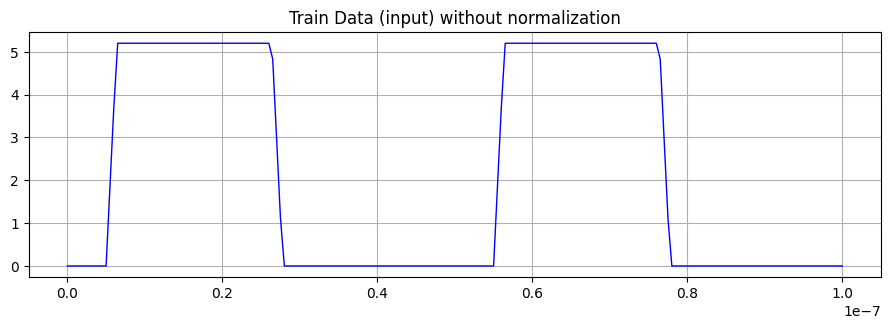

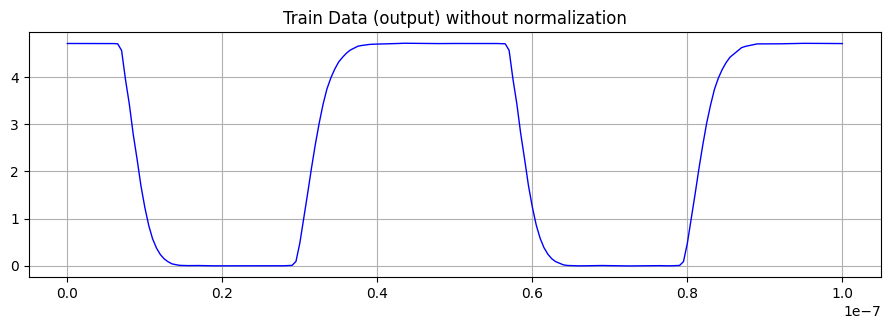

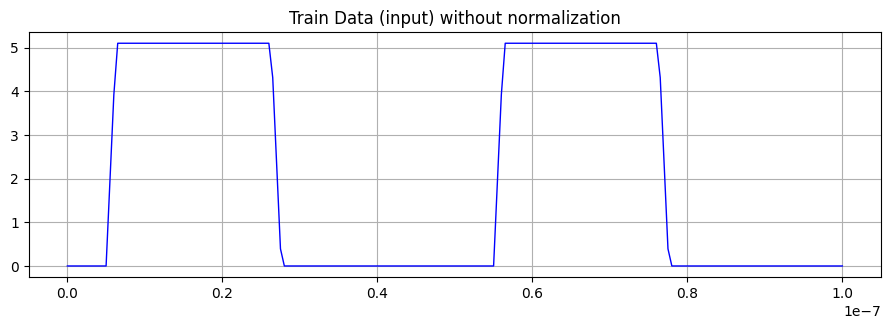

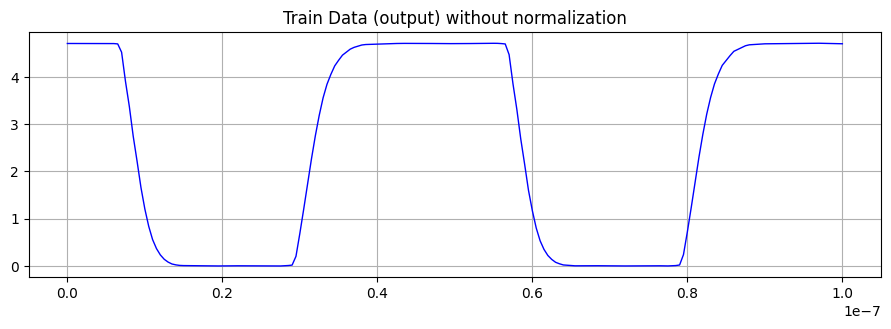

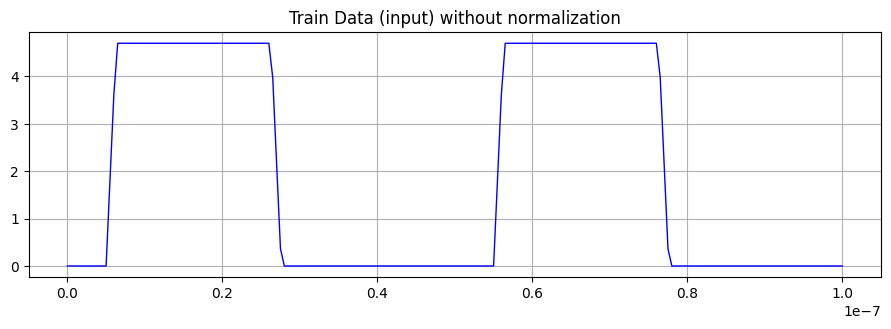

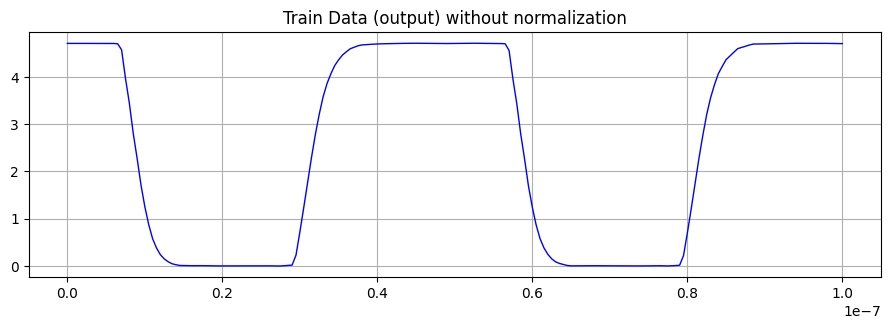

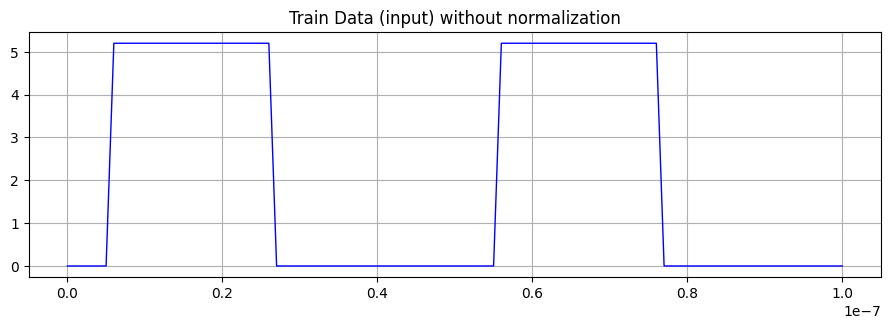

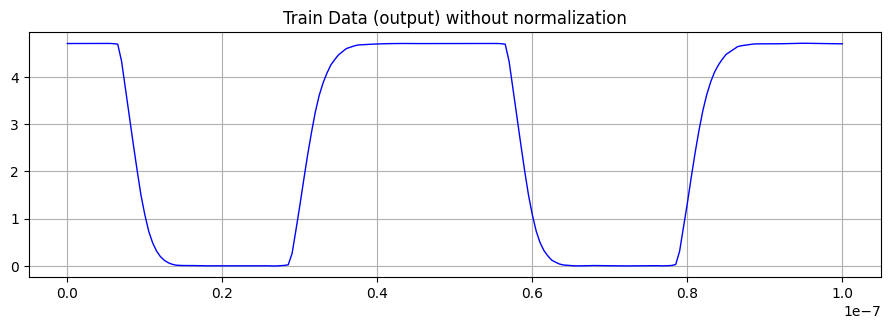

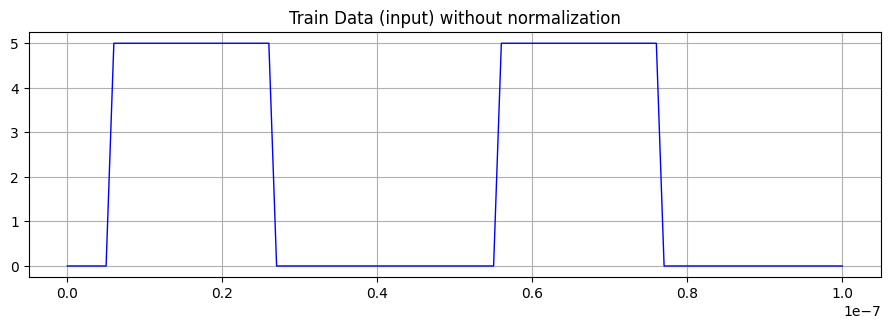

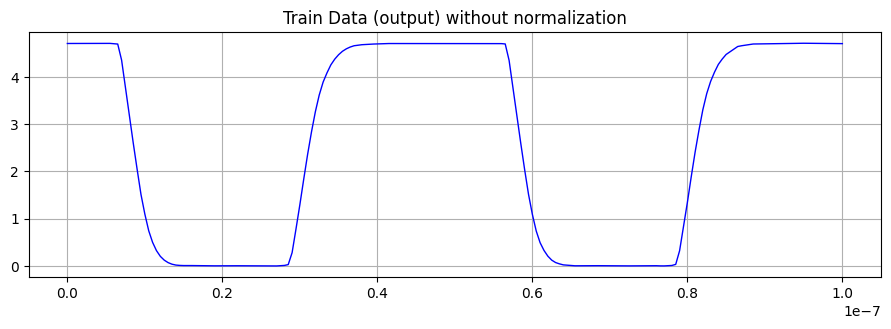

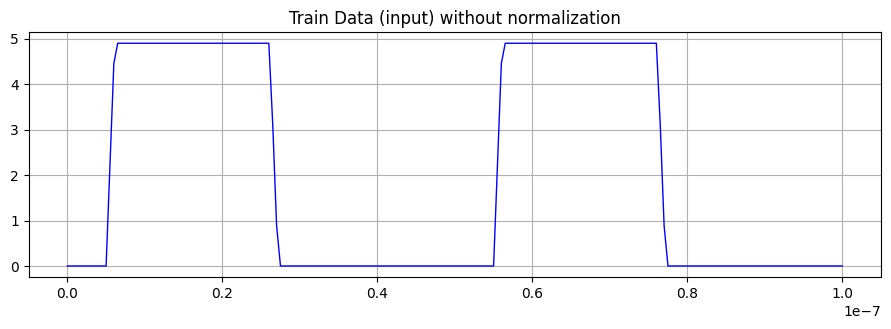

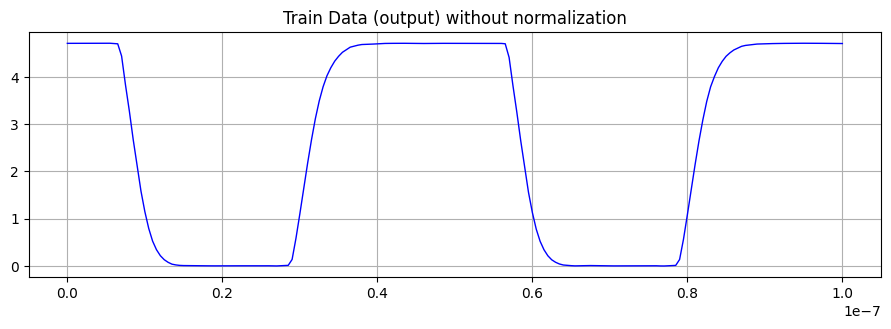

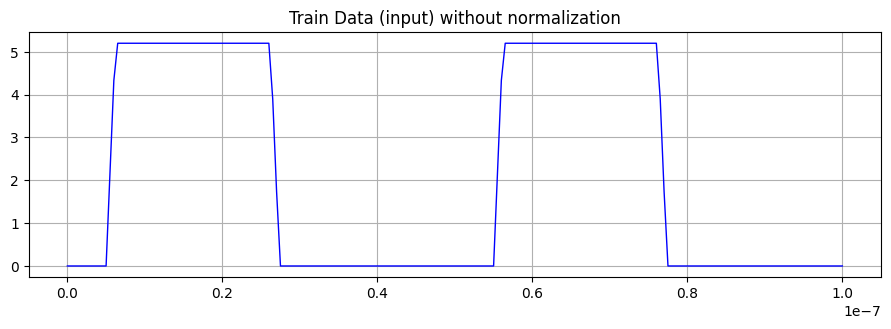

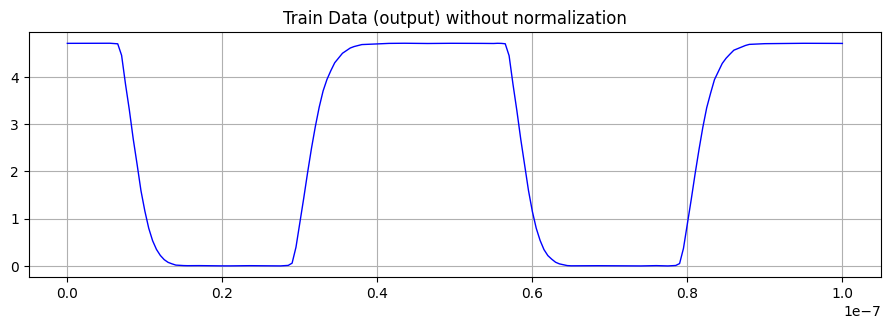

In [ ]:
#3
# prepare train data to pass to network
# in this part we prepare train data in form:(number of data,time steps,number of data in each time step)
from numpy import loadtxt
import random
import numpy
import os
from scipy import signal
import matplotlib.pyplot as plt
min1_in=[]
max1_in=[]
min1_out=[]
max1_out=[]
X=[]
Y=[]
x_plot=[]
temp_X=[]
temp_Y=[]
st='/content/drive/My Drive/sn540/Train/'#path to folder of train data

for filename in os.listdir(st):
    # mydata contains 3 lists which ,each one is a column of data files
    # (in data files we have:column 1 as time,column 2 as input ,column3 as output)
    # because value of times is not important we ignore them(mydata[0 is ignored])
    mydata = loadtxt(st+filename, unpack=True)
    my_input=mydata[1]
    inputx=[]
    # set input in desired form for network:
    # input shape should be:(number of data,time steps,number of data in each time step)
    # for example we have 12 data,each has 201 time step ,in each time step we have one input
    # so input shape is:(12,200,1)..
    x_plot.append(mydata[0])

    for i in my_input:
        inputx.append([i]) # NOTICE:If your data has more than one input,add all of them like:inputx.append([i,j,k])which i,j ,k,.. are inputs of your data

    my_output=mydata[2]#select output(2d list in mydata which is 3d column in data file)
    # if you normalized inputs,so normalize output like below:
    # my_output=(my_output - numpy.min(my_output)) / (numpy.max(my_output) - numpy.min(my_output))
    outputy=[]
    for i in my_output:
        outputy.append([i])
    fig = plt.figure(figsize=(11,7))
    ax0 = fig.add_subplot(211)
    ax0.set_title('Train Data (input) without normalization')
    ax0.plot(mydata[0],my_input,color='b',lw=1)

    ax0.grid()
    #plt.legend(["predicted","target value"])
    plt.show()
    fig2 = plt.figure(figsize=(11,7))
    ax0 = fig2.add_subplot(211)
    ax0.set_title('Train Data (output) without normalization')
    ax0.plot(mydata[0],my_output,color='b',lw=1)

    ax0.grid()
    #plt.legend(["predicted","target value"])
    plt.show()
    min1_out.append(numpy.min(my_output))
    max1_out.append(numpy.max(my_output))
    min1_in.append(numpy.min(my_input))
    max1_in.append(numpy.max(my_input))
    temp_X.append(my_input)
    temp_Y.append(my_output)
    X.append(inputx)# train input
    Y.append(outputy)#train  output

In [ ]:
#4
# implement normalization in range[0,1] on train data
mymin1_in=numpy.min(min1_in)
mymax1_in=numpy.max(max1_in)
mymin1_out=numpy.min(min1_out)
mymax1_out=numpy.max(max1_out)
input_seq2=temp_X
target_seq2=temp_Y
X=[]
Y=[]
for i in range(len(input_seq2)):
    input_seq2[i]=(input_seq2[i] - mymin1_in) / (mymax1_in - mymin1_in)
    target_seq2[i]=(target_seq2[i] - mymin1_out) / (mymax1_out - mymin1_out)
    outputy=[]
    for j in target_seq2[i]:
        outputy.append([j])
    inputx=[]
    for j in input_seq2[i]:
        inputx.append([j])
    X.append(inputx)# train input
    Y.append(outputy)#train  output




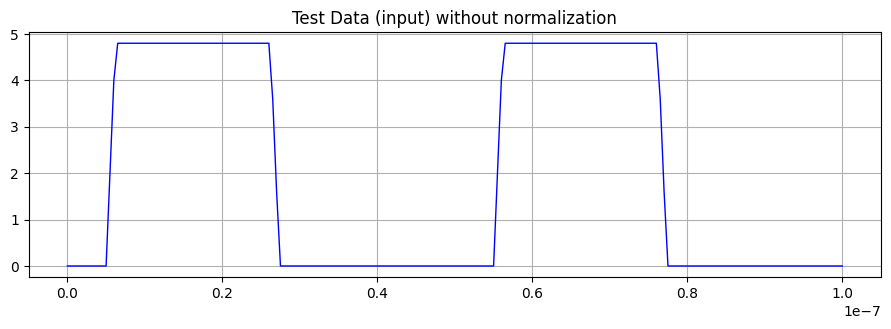

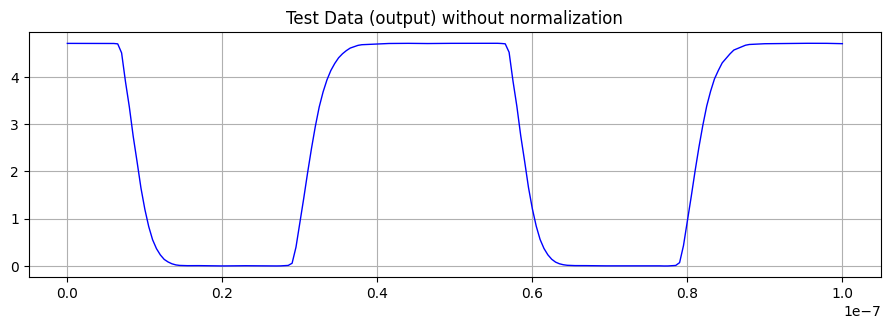

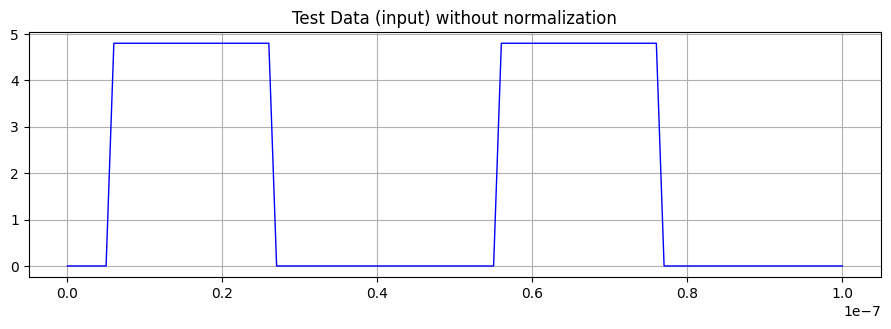

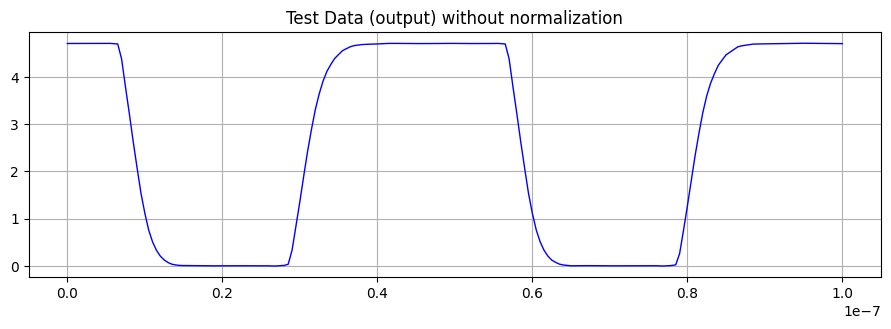

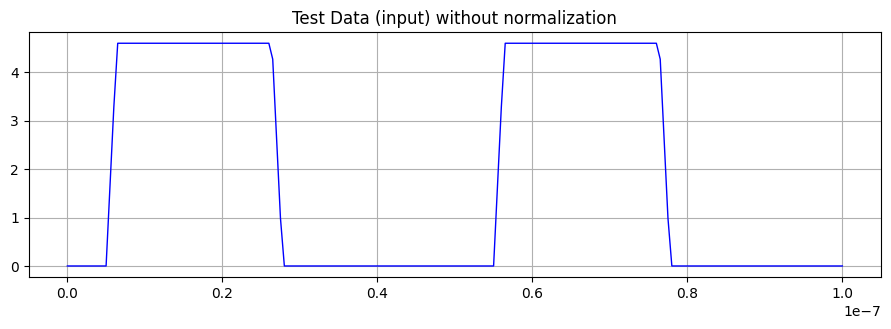

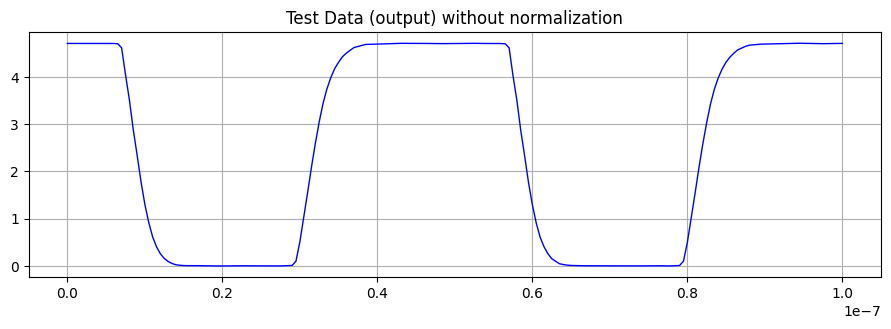

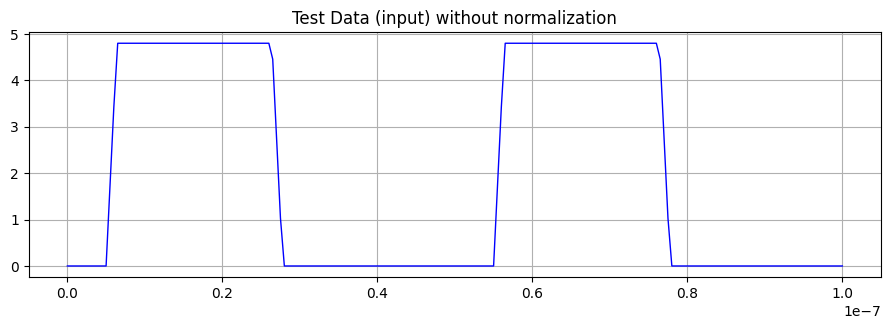

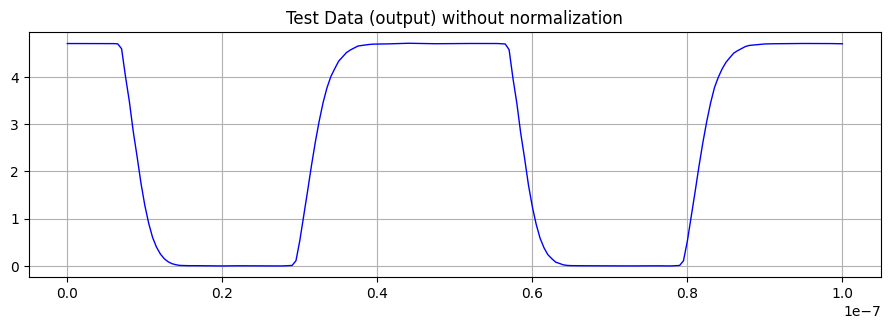

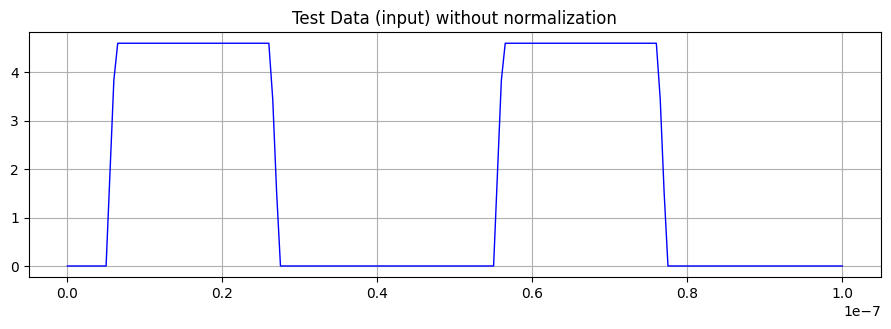

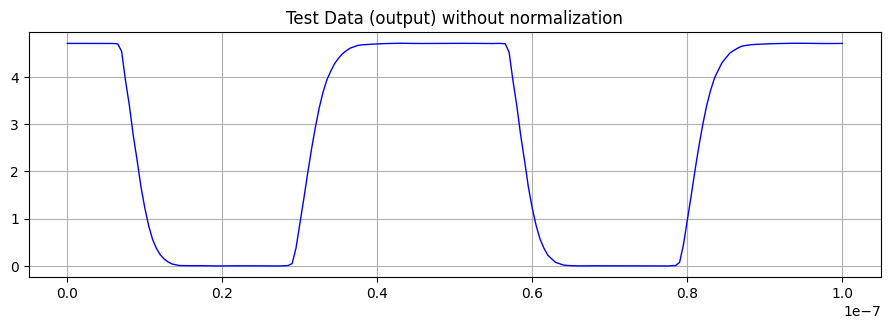

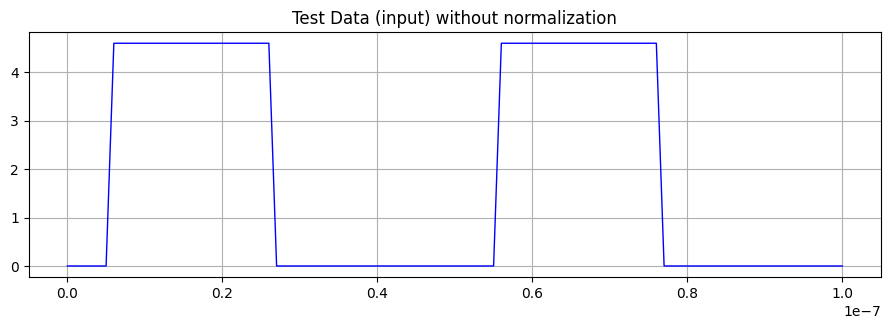

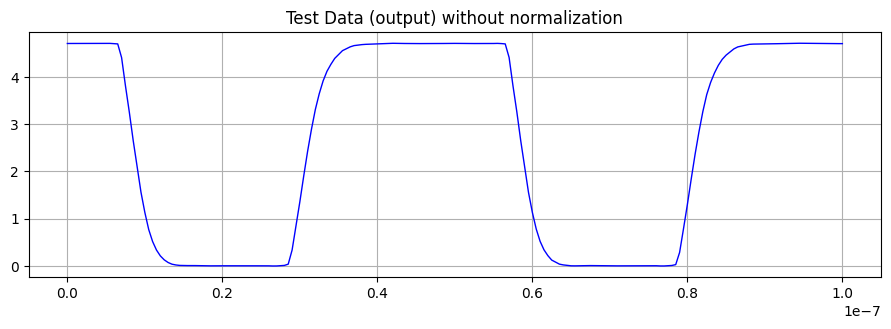

In [ ]:
#5
#prepare test data
import matplotlib.pyplot as plt
X_test=[]
Y_test=[]
x_plot_test=[]
temp_X2=[]
temp_Y2=[]
X_test=[]
Y_test=[]
st='/content/drive/My Drive/sn540/test/'
for filename in os.listdir(st):

    mydata = loadtxt(st+filename, unpack=True)
    my_input=mydata[1]
    inputx=[]
    x_plot_test.append(mydata[0])

    for i in my_input:
        inputx.append([i])

    my_output=mydata[2]
    outputy=[]
    for i in my_output:
        outputy.append([i])
    fig = plt.figure(figsize=(11,7))
    ax0 = fig.add_subplot(211)
    ax0.set_title('Test Data (input) without normalization')
    ax0.plot(mydata[0],my_input,color='b',lw=1)

    ax0.grid()
    #plt.legend(["predicted","target value"])
    plt.show()
    fig2 = plt.figure(figsize=(11,7))
    ax0 = fig2.add_subplot(211)
    ax0.set_title('Test Data (output) without normalization')
    ax0.plot(mydata[0],my_output,color='b',lw=1)

    ax0.grid()
    #plt.legend(["predicted","target value"])
    plt.show()
    temp_X2.append(my_input)
    temp_Y2.append(my_output)
    X_test.append(inputx)# test input
    Y_test.append(outputy)# train output


In [ ]:
#6
# implement normalization in range[0,1] on test data
input_seq22=temp_X2
target_seq22=temp_Y2
X_test=[]
Y_test=[]
for i in range(len(input_seq22)):
    input_seq22[i]=(input_seq22[i] - mymin1_in) / (mymax1_in - mymin1_in)
    target_seq22[i]=(target_seq22[i] - mymin1_out) / (mymax1_out - mymin1_out)
    outputy=[]
    for j in target_seq22[i]:
        outputy.append([j])
    inputx=[]
    for j in input_seq22[i]:
        inputx.append([j])
    X_test.append(inputx)# train input
    Y_test.append(outputy)#train  output

In [ ]:
    #7
    # here we interpolate data to all data have same lenght
    from scipy.interpolate import InterpolatedUnivariateSpline
    import numpy as np
    inter_len=200# number of interpolation (changes data to 200 time step)
    X_new=[]
    for i in X:
        x=range(0,len(i))# number of time steps for original time serie
        y=i
        interpolation_function = InterpolatedUnivariateSpline(x,y,k=2)
        new_x = np.arange(0,len(x),len(x)/inter_len)
        new_y = interpolation_function(new_x)
        if(len(new_y)>inter_len):
            interpolation_function = InterpolatedUnivariateSpline(x,y,k=2)
            new_x = np.arange(0,len(x),(len(x)/inter_len)+0.003)
            new_y = interpolation_function(new_x)
        xx=[]
        for j in new_y:
          xx.append([j])
        X_new.append(xx)


In [ ]:
    #8
    # iterpolate test input data
    from scipy.interpolate import InterpolatedUnivariateSpline
    import numpy as np
    #inter_len=200
    X_new_test=[]
    for i in X_test:
        x=range(0,len(i))# number of time steps for original time serie
        y=i
        interpolation_function = InterpolatedUnivariateSpline(x,y,k=2)
        new_x = np.arange(0,len(x),len(x)/inter_len)
        new_y = interpolation_function(new_x)
        if(len(new_y)>inter_len):
            interpolation_function = InterpolatedUnivariateSpline(x,y,k=2)
            new_x = np.arange(0,len(x),(len(x)/inter_len)+0.003)
            new_y = interpolation_function(new_x)
        xx=[]
        for j in new_y:
          xx.append([j])
        X_new_test.append(xx)

In [ ]:
    #9
    # # iterpolate train output data
    from scipy.interpolate import InterpolatedUnivariateSpline
    import numpy as np
    #inter_len=200
    Y_new=[]
    for i in Y:
        x=range(0,len(i))# number of time steps for original time serie
        y=i
        interpolation_function = InterpolatedUnivariateSpline(x,y,k=2)
        new_x = np.arange(0,len(x),len(x)/inter_len)
        new_y = interpolation_function(new_x)
        if(len(new_y)>inter_len):
            interpolation_function = InterpolatedUnivariateSpline(x,y,k=2)
            new_x = np.arange(0,len(x),(len(x)/inter_len)+0.003)
            new_y = interpolation_function(new_x)
        xx=[]
        for j in new_y:
          xx.append([j])
        Y_new.append(xx)

In [ ]:
    #10
    # # iterpolate test output data
    from scipy.interpolate import InterpolatedUnivariateSpline
    import numpy as np
    #inter_len=200
    Y_new_test=[]
    for i in Y_test:
        x=range(0,len(i))# number of time steps for original time serie
        y=i
        interpolation_function = InterpolatedUnivariateSpline(x,y,k=2)
        new_x = np.arange(0,len(x),len(x)/inter_len)
        new_y = interpolation_function(new_x)
        if(len(new_y)>inter_len):
            interpolation_function = InterpolatedUnivariateSpline(x,y,k=2)
            new_x = np.arange(0,len(x),(len(x)/inter_len)+0.003)
            new_y = interpolation_function(new_x)
        xx=[]
        for j in new_y:
          xx.append([j])
        Y_new_test.append(xx)

In [ ]:
    #11
    # iterpolate train time
    from scipy.interpolate import InterpolatedUnivariateSpline
    import numpy as np
    #inter_len=200
    X_plot_new=[]
    for i in x_plot:
        x=range(0,len(i))# number of time steps for original time serie
        y=i
        interpolation_function = InterpolatedUnivariateSpline(x,y,k=2)
        new_x = np.arange(0,len(x),len(x)/inter_len)
        new_y = interpolation_function(new_x)
        if(len(new_y)>inter_len):
            interpolation_function = InterpolatedUnivariateSpline(x,y,k=2)
            new_x = np.arange(0,len(x),(len(x)/inter_len)+0.003)
            new_y = interpolation_function(new_x)

        X_plot_new.append(new_y)

In [ ]:
    #12
    # iterpolate test time
    from scipy.interpolate import InterpolatedUnivariateSpline
    import numpy as np
    #inter_len=200
    X_plot_new_test=[]
    for i in x_plot_test:
        x=range(0,len(i))# number of time steps for original time serie
        y=i
        interpolation_function = InterpolatedUnivariateSpline(x,y,k=2)
        new_x = np.arange(0,len(x),len(x)/inter_len)
        new_y = interpolation_function(new_x)
        if(len(new_y)>inter_len):
            interpolation_function = InterpolatedUnivariateSpline(x,y,k=2)
            new_x = np.arange(0,len(x),(len(x)/inter_len)+0.003)
            new_y = interpolation_function(new_x)

        X_plot_new_test.append(new_y)

In [ ]:
X=X_new
Y=Y_new
X_test=X_new_test
Y_test=Y_new_test

In [ ]:
import numpy
print("train input shape:",numpy.array(X).shape)
print("train output shape",numpy.array(Y).shape)
print("test input shape:",numpy.array(X_test).shape)
print("test output shape",numpy.array(Y_test).shape)

train input shape: (9, 200, 1)
train output shape (9, 200, 1)
test input shape: (6, 200, 1)
test output shape (6, 200, 1)


In [ ]:
import tensorflow
import keras
from keras.models import Sequential
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint


# ALL THE STEPS ARE SAME AS MLP,THE ONLY DIFFERENCE IS IN USING RNN.


# create network:
# input_shape=[number_timestep,number_input]
# for example input_shape=[201,1] :means our data have 201 time step and each time step has one value

# return_sequences=True: because we are modeling a time serie and need output of all steps
# so each step of network must returen output in that step(contrary to classification)
# if we have classification problem we set return_sequences=False,to have only output of last step(which is class)

#.layers.Dense(1) output layer of each time step has one output
# notice:because we we want to predict a float value,so we dont use activation function in last layer
number_timestep=len(X[0])# WHEN GENERATING DATA,TRY TO HAVE REASONABLE TIMESTEPS(LIKE 500 NOT 25000!)
number_input=len(X[0][0])
model = tensorflow.keras.Sequential()
model.add(layers.SimpleRNN(50,input_shape=[number_timestep,number_input],return_sequences=True,activation='sigmoid'))
model.add(layers.SimpleRNN(50,return_sequences=True,activation='tanh'))
model.add(layers.SimpleRNN(50,return_sequences=True,activation='sigmoid'))
model.add(layers.SimpleRNN(50,return_sequences=True,activation='sigmoid'))
model.add(tensorflow.keras.layers.Dense(1))

# set optimizer
# set optimizer(you can use optimizers other than Adam)
# if you are not satisfied with the result of training ,you can change learning_rate
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.001)
# compile network
model.compile(loss='huber',
              optimizer=opt,
              metrics=['accuracy'])

batch_size=32
#validation_data : a part of data which is used to monitor model during training(arbitrary)
#ModelCheckpoint: save model to be used later(save_best_only=True saves network based on best result )
#  monitor='val_loss':saves model based on loss of validation data

# we use validation data to save best network durin training :
if(X_test!=[]):
    X_validation=X_test
    Y_validation=Y_test
else:
    X_validation=X
    Y_validation=Y
model.fit(X,Y,
          batch_size=batch_size,
          epochs=100,
          validation_data=(X_validation,Y_validation),
          callbacks=[ModelCheckpoint('imdb_indrnn.h5', monitor='val_loss',
                                     save_best_only=True, save_weights_only=True)])


Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.2029 - accuracy: 0.0000e+00 - val_loss: 0.1420 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 496ms/step - loss: 0.1416 - accuracy: 0.0000e+00 - val_loss: 0.1109 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 1s 562ms/step - loss: 0.1108 - accuracy: 0.0000e+00 - val_loss: 0.1054 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 385ms/step - loss: 0.1055 - accuracy: 0.0000e+00 - val_loss: 0.1148 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 250ms/step - loss: 0.1151 - accuracy: 0.0000e+00 - val_loss: 0.1252 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 232ms/step - loss: 0.1255 - accuracy: 0.0000e+00 - val_loss: 0.1283 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 231ms/step - loss: 0.1286 - accuracy: 0.0000e+00 - val_

In [ ]:

# load (best)saved weights(notice:if we dont use this,model is based on last epoch of training)
model.load_weights('imdb_indrnn.h5')
# here we can save a  model:
# save a model
model.save('imdb_indrnn.h5')
# here we load a saved model(dont confuse this load whit 'model.load_weights('weights/imdb_indrnn.h5')' )
mymodel=keras.models.load_model('imdb_indrnn.h5')
# now we can use mymodel as a "trained" model and just pass data to it to get result

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 485ms/step


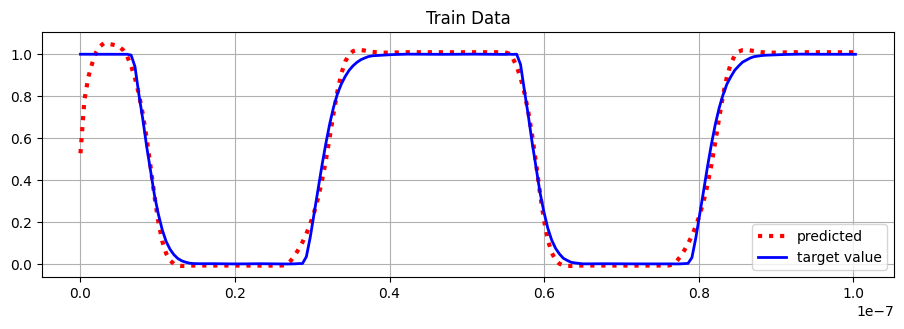

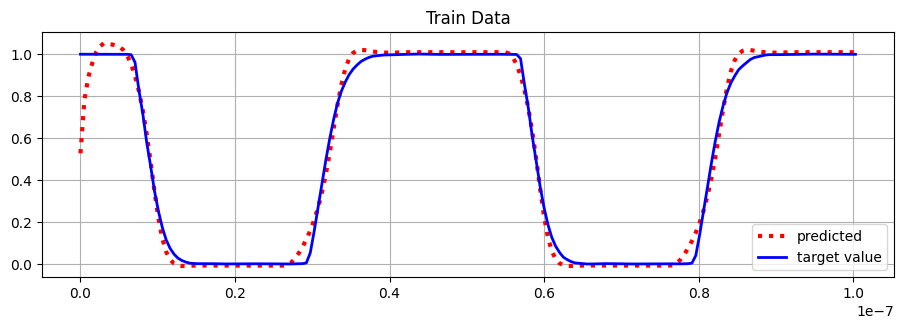

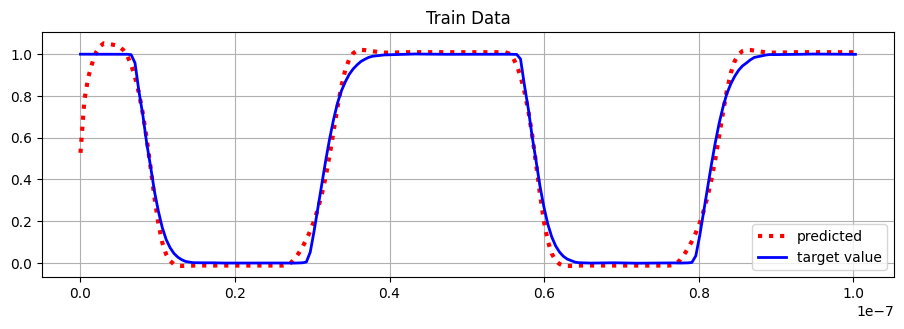

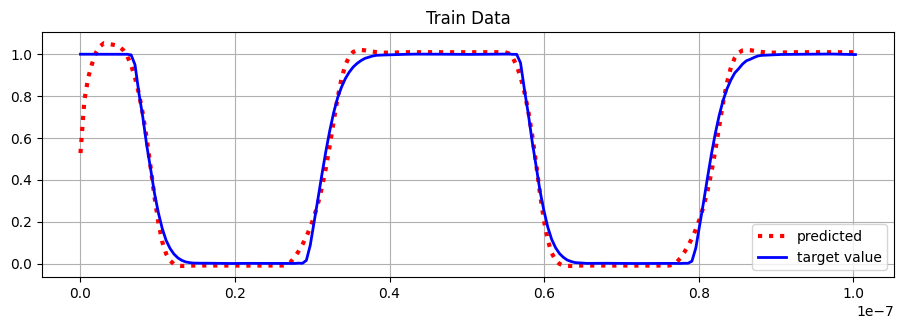

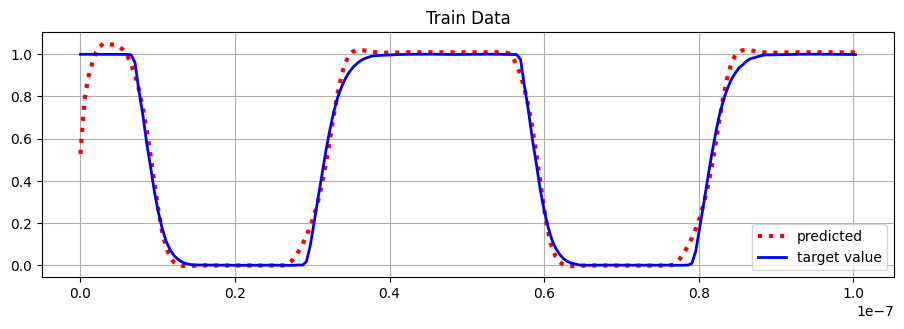

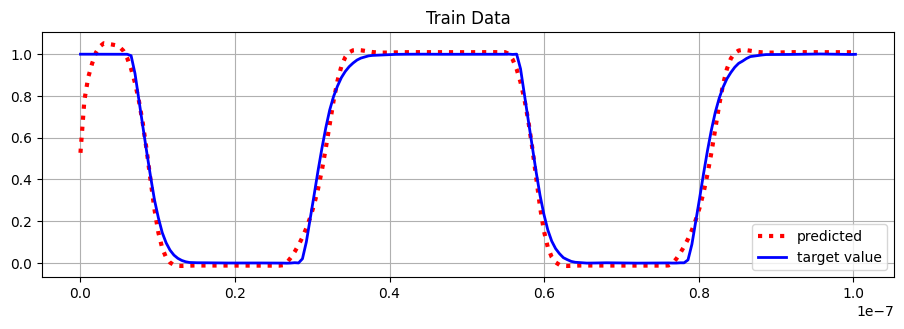

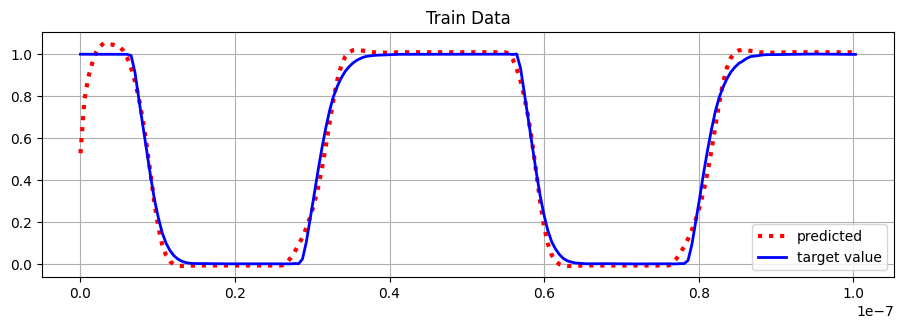

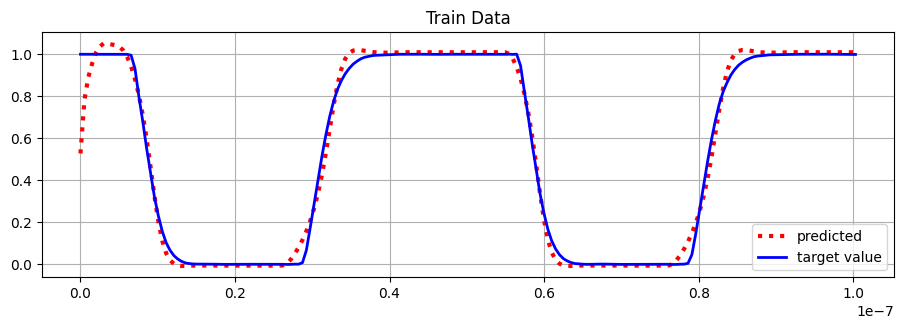

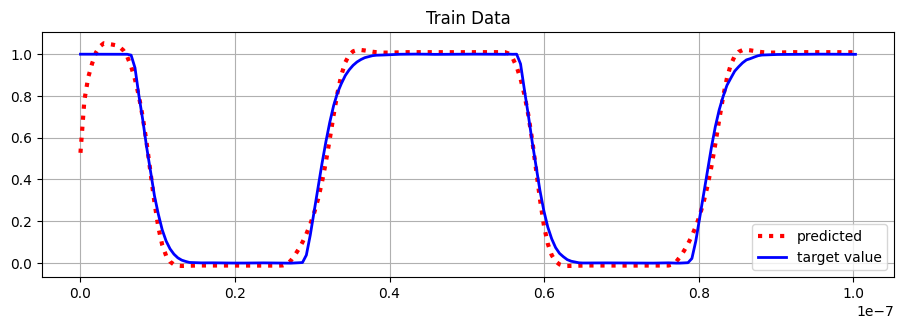

total mse train: 0.0026129795357495134


In [ ]:
    # plot the result on train data
    import numpy
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_squared_error
    mse_train=0
    predicted=mymodel.predict(X)
    for i in range(len(X)):
        fig = plt.figure(figsize=(11,7))
        ax0 = fig.add_subplot(211)

        aa=numpy.array(predicted[i])
        bb=numpy.array(Y[i])
        ax0.set_title('Train Data')
        ax0.plot(X_plot_new[i],aa,color='r',lw=3,label='NN Output',linestyle=':')
        ax0.plot(X_plot_new[i],bb,color='b',marker='None',lw=2,markersize=2,label='Train Data')
        ax0.grid()
        plt.legend(["predicted","target value"])
        plt.show()
        mse_train+=mean_squared_error(aa,bb)
    print('total mse train:',mse_train/len(X))

1/1 [==============================] - 0s 73ms/step


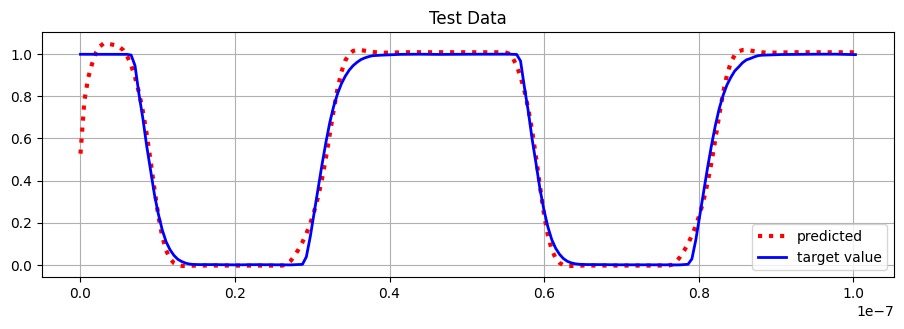

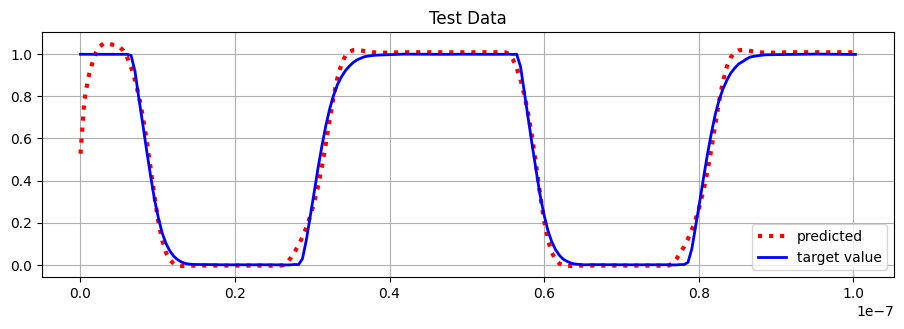

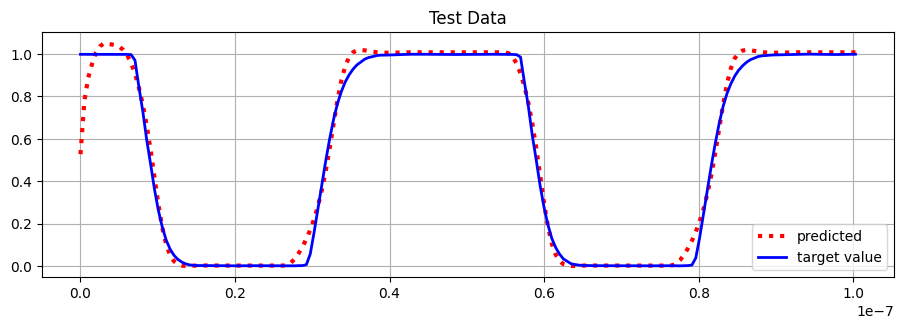

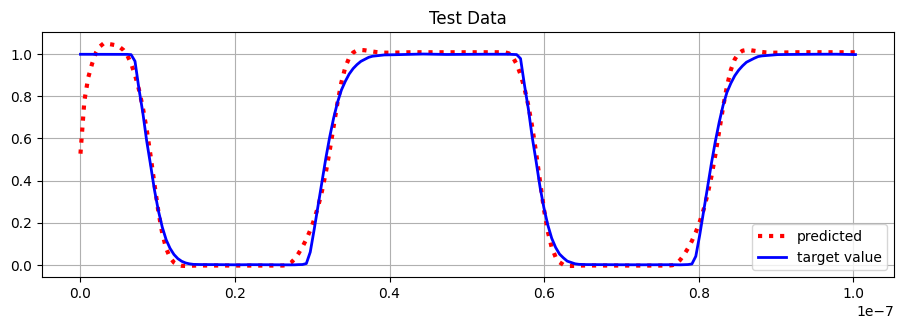

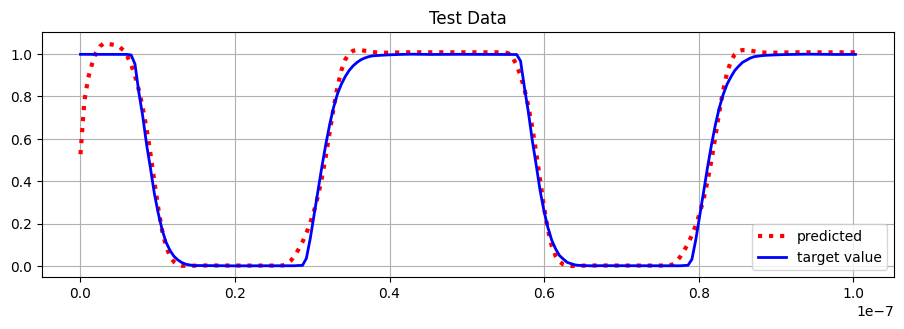

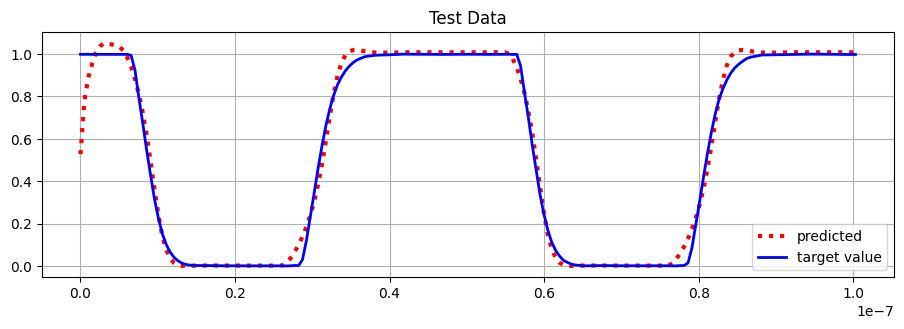

total mse test: 0.002521346127630893


In [ ]:
    # plot the result on test data
    import numpy
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_squared_error
    mse_test=0
    predicted=mymodel.predict(X_test)
    for i in range(len(X_test)):
        fig = plt.figure(figsize=(11,7))
        ax0 = fig.add_subplot(211)

        aa=numpy.array(predicted[i])
        bb=numpy.array(Y_test[i])
        ax0.set_title('Test Data')
        ax0.plot(X_plot_new_test[i],aa,color='r',lw=3,label='NN Output',linestyle=':')
        ax0.plot(X_plot_new_test[i],bb,color='b',marker='None',lw=2,markersize=2,label='Test Data')
        ax0.grid()
        plt.legend(["predicted","target value"])
        plt.show()
        mse_test+=mean_squared_error(aa,bb)
    print('total mse test:',mse_test/len(X_test))

In [ ]:
print(predicted)

[[[0.5273823 ]
  [0.77788407]
  [0.88906085]
  ...
  [1.0081813 ]
  [1.0081861 ]
  [1.0081886 ]]

 [[0.5273823 ]
  [0.77788407]
  [0.88906085]
  ...
  [1.0081847 ]
  [1.0081877 ]
  [1.0081891 ]]

 [[0.5273823 ]
  [0.77788407]
  [0.88906085]
  ...
  [1.0081779 ]
  [1.008184  ]
  [1.0081875 ]]

 [[0.5273823 ]
  [0.77788407]
  [0.88906085]
  ...
  [1.0081768 ]
  [1.0081831 ]
  [1.0081872 ]]

 [[0.5273823 ]
  [0.77788407]
  [0.88906085]
  ...
  [1.008182  ]
  [1.0081865 ]
  [1.0081887 ]]

 [[0.5273823 ]
  [0.77788407]
  [0.88906085]
  ...
  [1.0081851 ]
  [1.008188  ]
  [1.0081891 ]]]
